# Data Visualization: criando gráficos com bibliotecas Python

In [54]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# 1. Gathering Data

In [4]:
data_imigration = pd.read_csv("canadian_immegration_data.csv", delimiter=',')
data_imigration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [5]:
data_imigration.describe().round(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,...,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00
mean,508.39,566.99,534.72,387.44,376.50,358.86,441.27,691.13,714.39,843.24,...,1320.29,1266.96,1191.82,1246.39,1275.73,1420.29,1262.53,1313.96,1320.70,32867.45
std,1949.59,2152.64,1867.00,1204.33,1198.25,1079.31,1225.58,2109.21,2443.61,2555.05,...,4425.96,3926.72,3443.54,3694.57,3829.63,4462.95,4030.08,4247.56,4237.95,91785.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,1.00,1.00,...,28.50,25.00,31.00,31.00,36.00,40.50,37.50,42.50,45.00,952.00
50%,13.00,10.00,11.00,12.00,13.00,17.00,18.00,26.00,34.00,44.00,...,210.00,218.00,198.00,205.00,214.00,211.00,179.00,233.00,213.00,5018.00
75%,251.50,295.50,275.00,173.00,181.00,197.00,254.00,434.00,409.00,508.50,...,832.00,842.00,899.00,934.50,888.00,932.00,772.00,783.00,796.00,22239.50
max,22045.00,24796.00,20620.00,10015.00,10170.00,9564.00,9470.00,21337.00,27359.00,23795.00,...,42584.00,33848.00,28742.00,30037.00,29622.00,38617.00,36765.00,34315.00,34129.00,691904.00


# 2. Preprocessing Data

In [6]:
data_imigration.set_index('Country', inplace=True)
data_imigration.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


# 3. Checking Brazilian migration trend to Canada

In [7]:
years = list(map(str, range(1980,2014)))
data_brazil = pd.DataFrame(data_imigration.loc['Brazil', years])

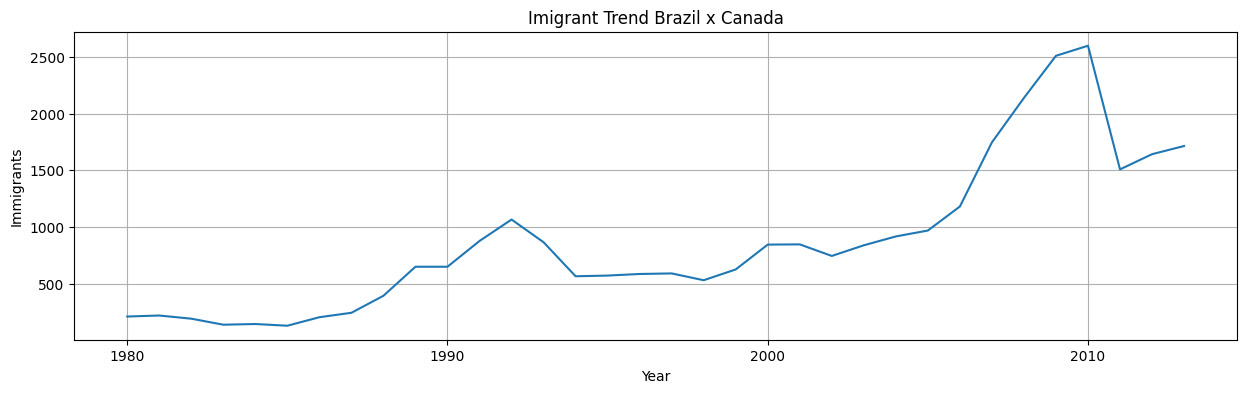

In [8]:
plt.figure(figsize=(15,4))
plt.plot(data_brazil.index, data_brazil.Brazil)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Immigrants')
plt.title('Imigrant Trend Brazil x Canada')

plt.xticks(['1980', '1990', '2000', '2010'])
plt.show()

Text(0, 0.5, 'Immigrants')

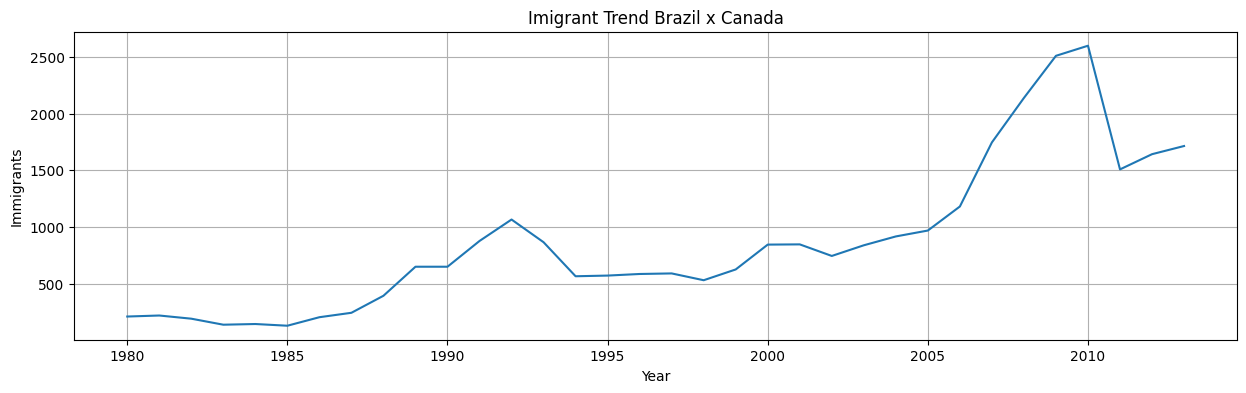

In [9]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(data_brazil.index, data_brazil.Brazil)

ax.set_title('Imigrant Trend Brazil x Canada')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Immigrants')

# 4. Comparing wth other countries trend

In [10]:
data_brazil = pd.DataFrame(data_imigration.loc['Brazil', years])
data_venezuela = pd.DataFrame(data_imigration.loc['Venezuela (Bolivarian Republic of)', years])
data_colombia = pd.DataFrame(data_imigration.loc['Colombia', years])
data_argentina = pd.DataFrame(data_imigration.loc['Argentina', years])

In [11]:
data_imigration.index.unique()

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

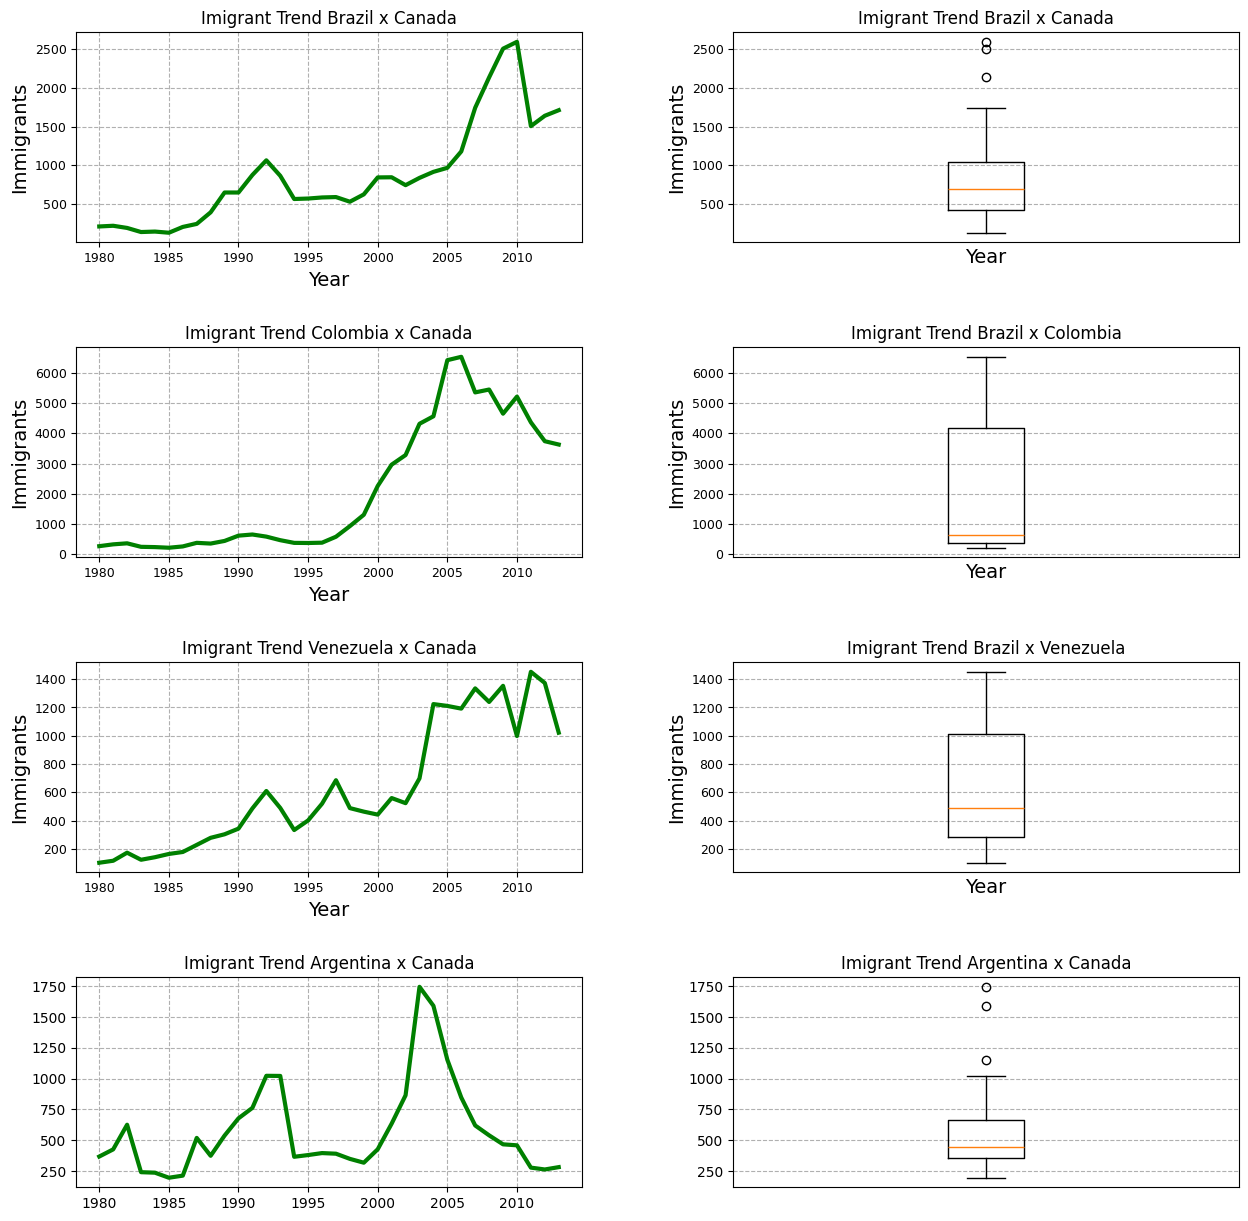

In [12]:
fig, ax = plt.subplots(4,2, figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
lw=3 
color='g'
linestyle='--'

ax[0,0].plot(data_brazil.index, data_brazil.Brazil, lw=lw, color=color)
ax[0,0].set_title('Imigrant Trend Brazil x Canada')
ax[0,0].xaxis.set_major_locator(plt.MultipleLocator(5))
ax[0,0].grid(linestyle=linestyle)

ax[0,1].boxplot(data_brazil.Brazil)
ax[0,1].set_title('Imigrant Trend Brazil x Canada')
ax[0,1].xaxis.set_major_locator(plt.MultipleLocator(5))
ax[0,1].grid(linestyle=linestyle)

ax[1,0].plot(data_colombia.index, data_colombia.Colombia, lw=lw, color=color)
ax[1,0].set_title('Imigrant Trend Colombia x Canada')
ax[1,0].xaxis.set_major_locator(plt.MultipleLocator(5))
ax[1,0].grid(linestyle=linestyle)

ax[1,1].boxplot(data_colombia.Colombia)
ax[1,1].set_title('Imigrant Trend Brazil x Colombia')
ax[1,1].xaxis.set_major_locator(plt.MultipleLocator(5))
ax[1,1].grid(linestyle=linestyle)

ax[2,0].plot(data_venezuela.index, data_venezuela['Venezuela (Bolivarian Republic of)'], lw=lw, color=color)
ax[2,0].set_title('Imigrant Trend Venezuela x Canada')
ax[2,0].xaxis.set_major_locator(plt.MultipleLocator(5))
ax[2,0].grid(linestyle=linestyle)

ax[2,1].boxplot(data_venezuela['Venezuela (Bolivarian Republic of)'])
ax[2,1].set_title('Imigrant Trend Brazil x Venezuela')
ax[2,1].xaxis.set_major_locator(plt.MultipleLocator(5))
ax[2,1].grid(linestyle=linestyle)

ax[3,0].plot(data_argentina.index, data_argentina.Argentina, lw=lw, color=color)
ax[3,0].set_title('Imigrant Trend Argentina x Canada')
ax[3,0].xaxis.set_major_locator(plt.MultipleLocator(5))
ax[3,0].grid(linestyle=linestyle)

ax[3,1].boxplot(data_argentina.Argentina)
ax[3,1].set_title('Imigrant Trend Argentina x Canada')
ax[3,1].xaxis.set_major_locator(plt.MultipleLocator(5))
ax[3,1].grid(linestyle=linestyle)

for i in range(3):
    for j in range(2):
        ax[i,j].xaxis.set_tick_params(labelsize=9)
        ax[i,j].yaxis.set_tick_params(labelsize=9)
        ax[i,j].set_xlabel('Year', fontsize=14)
        ax[i,j].set_ylabel('Immigrants', fontsize=14)

plt.show()

# 5. Changing matplot styles

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [14]:
IPython_default = plt.rcParams.copy()
plt.style.use('seaborn-v0_8')

Text(0, 0.5, 'Immigrants')

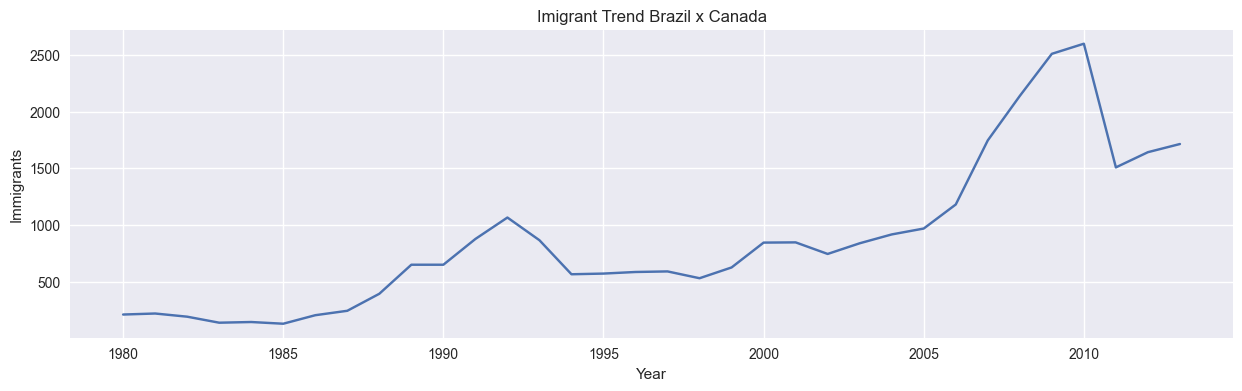

In [15]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(data_brazil.index, data_brazil.Brazil)

ax.set_title('Imigrant Trend Brazil x Canada')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Immigrants')

In [16]:
plt.rcParams.update(IPython_default);

Text(0, 0.5, 'Immigrants')

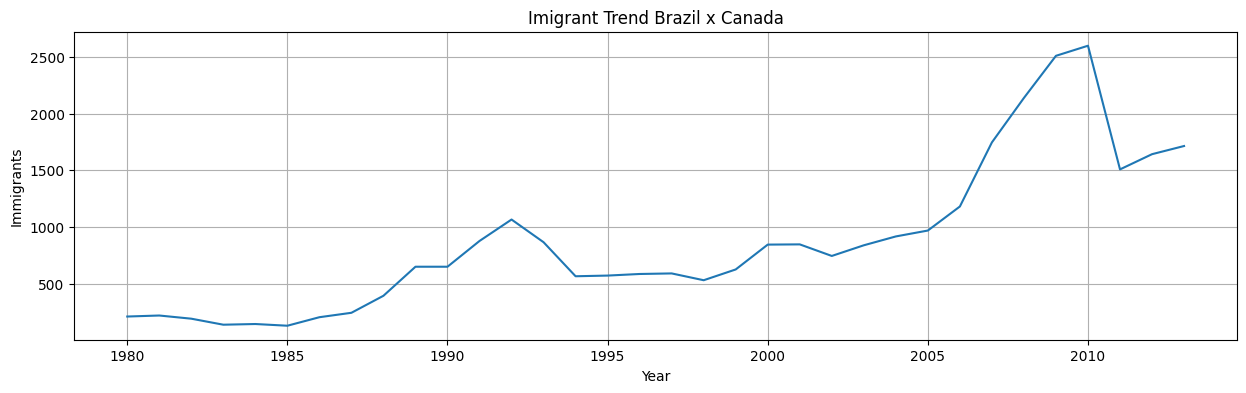

In [17]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(data_brazil.index, data_brazil.Brazil)

ax.set_title('Imigrant Trend Brazil x Canada')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Immigrants')

# 6. Comparing South-America Imigration Sum

In [18]:
data_south_america = data_imigration.query('Region == "South America"')
data_south_america.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205


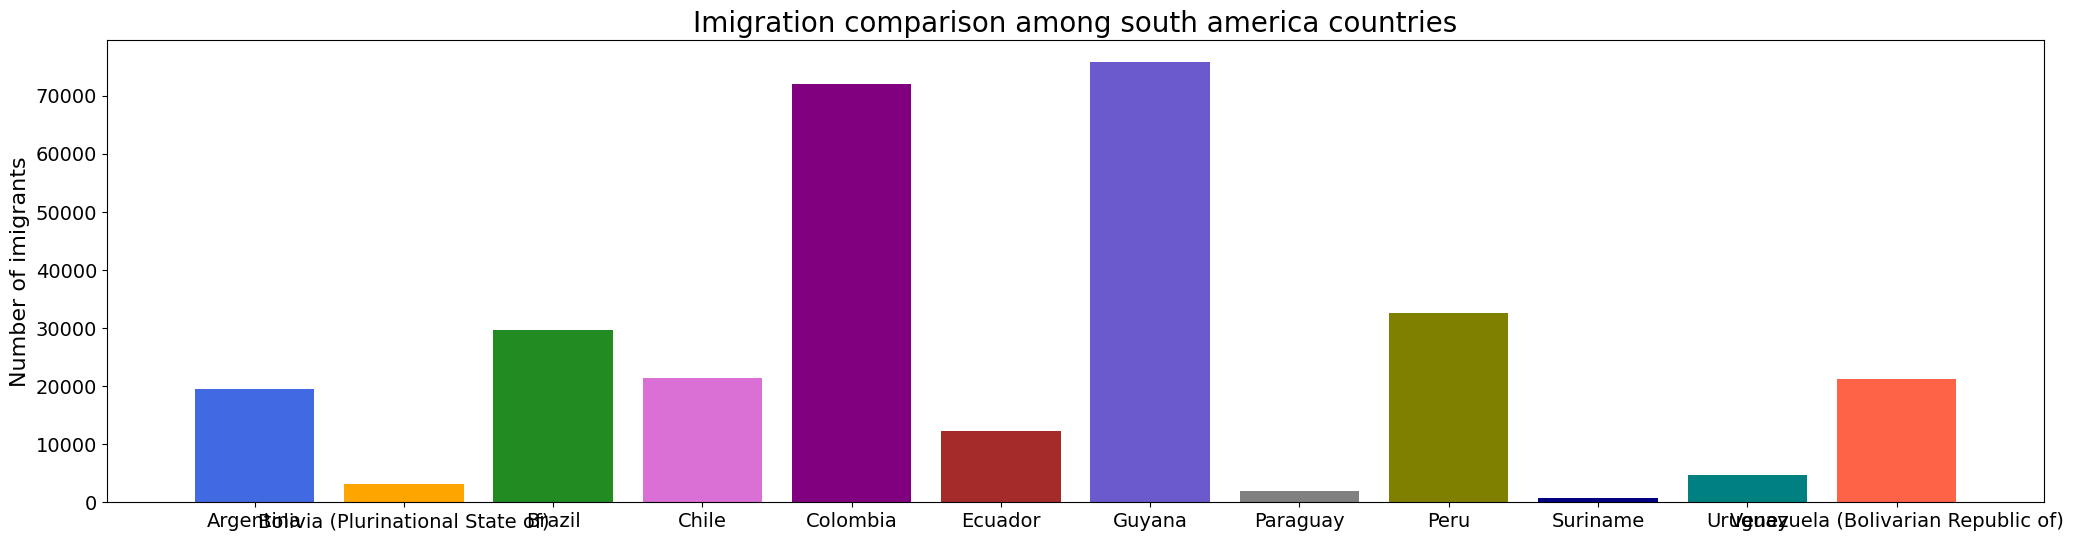

In [19]:
fig, ax = plt.subplots(figsize=(25,6))
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']


ax.bar(data_south_america.index, data_south_america.Total, color=cores)
ax.set_title("Imigration comparison among south america countries", fontsize=20)
ax.set_ylabel("Number of imigrants", fontsize=16)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
plt.show()

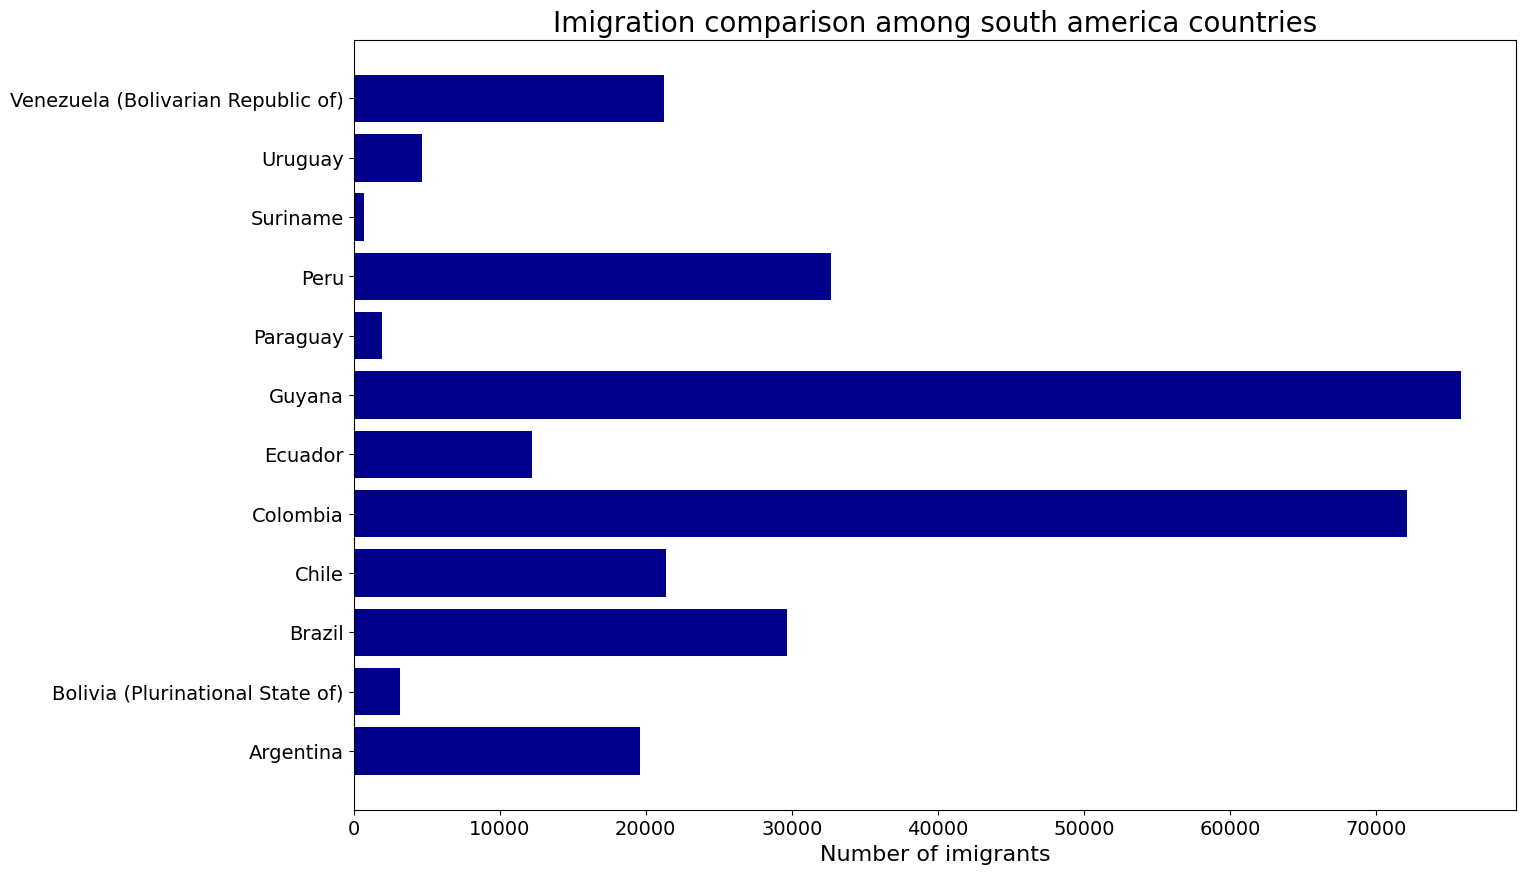

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
cores = ['darkblue']

ax.barh(data_south_america.index, data_south_america.Total, color=cores)
ax.set_title("Imigration comparison among south america countries", fontsize=20)
ax.set_xlabel("Number of imigrants", fontsize=16)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
plt.show()

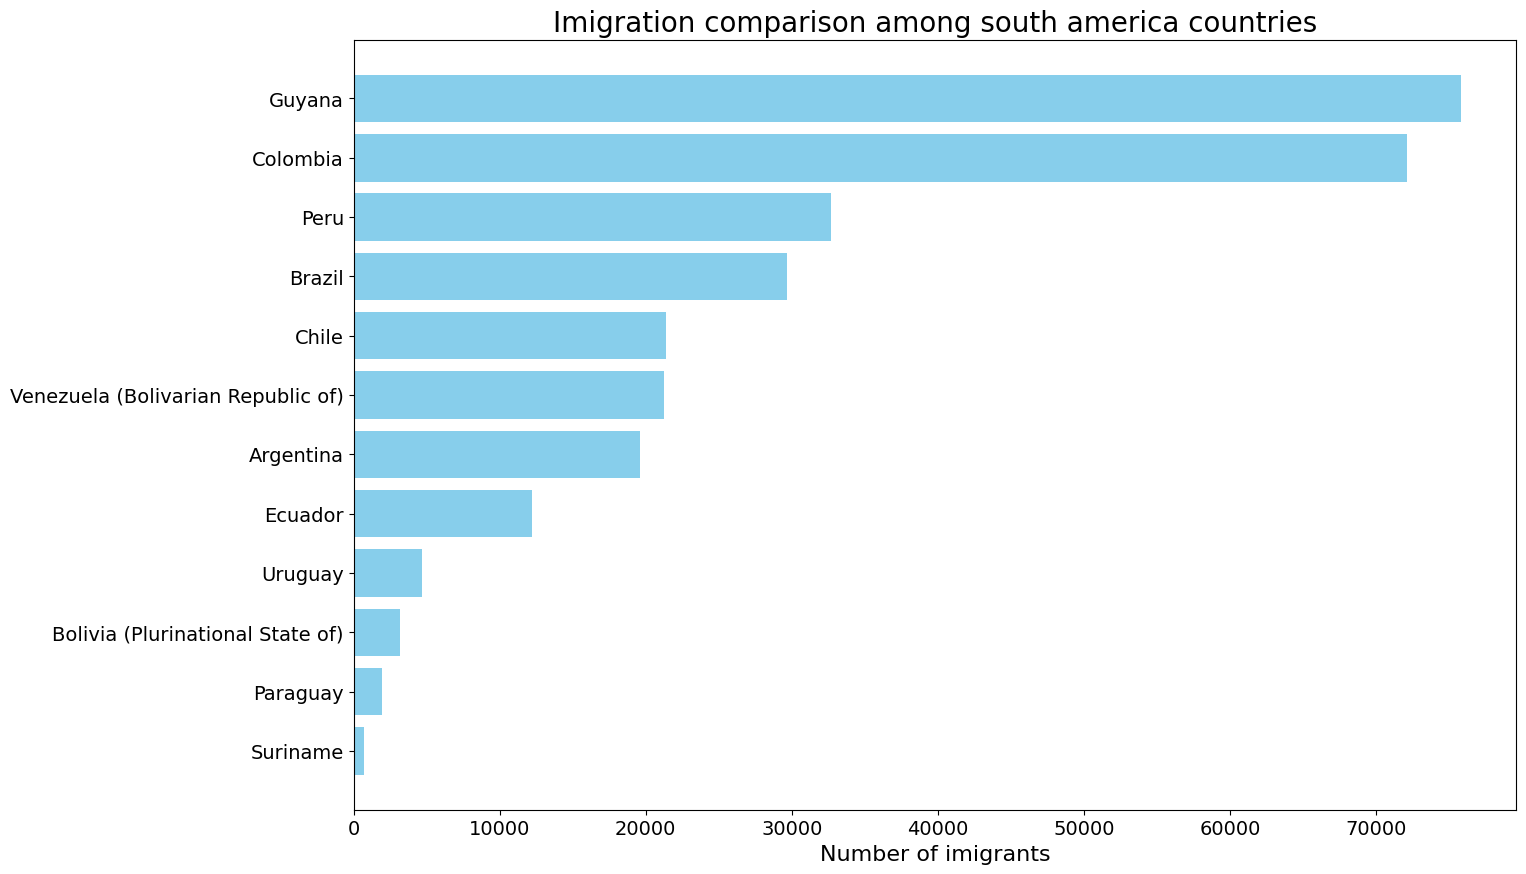

In [21]:
data_south_america = data_south_america.sort_values('Total', ascending=True)
fig, ax = plt.subplots(figsize=(15,10))
cores = ['skyblue']

ax.barh(data_south_america.index, data_south_america.Total, color=cores)
ax.set_title("Imigration comparison among south america countries", fontsize=20)
ax.set_xlabel("Number of imigrants", fontsize=16)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
plt.show()

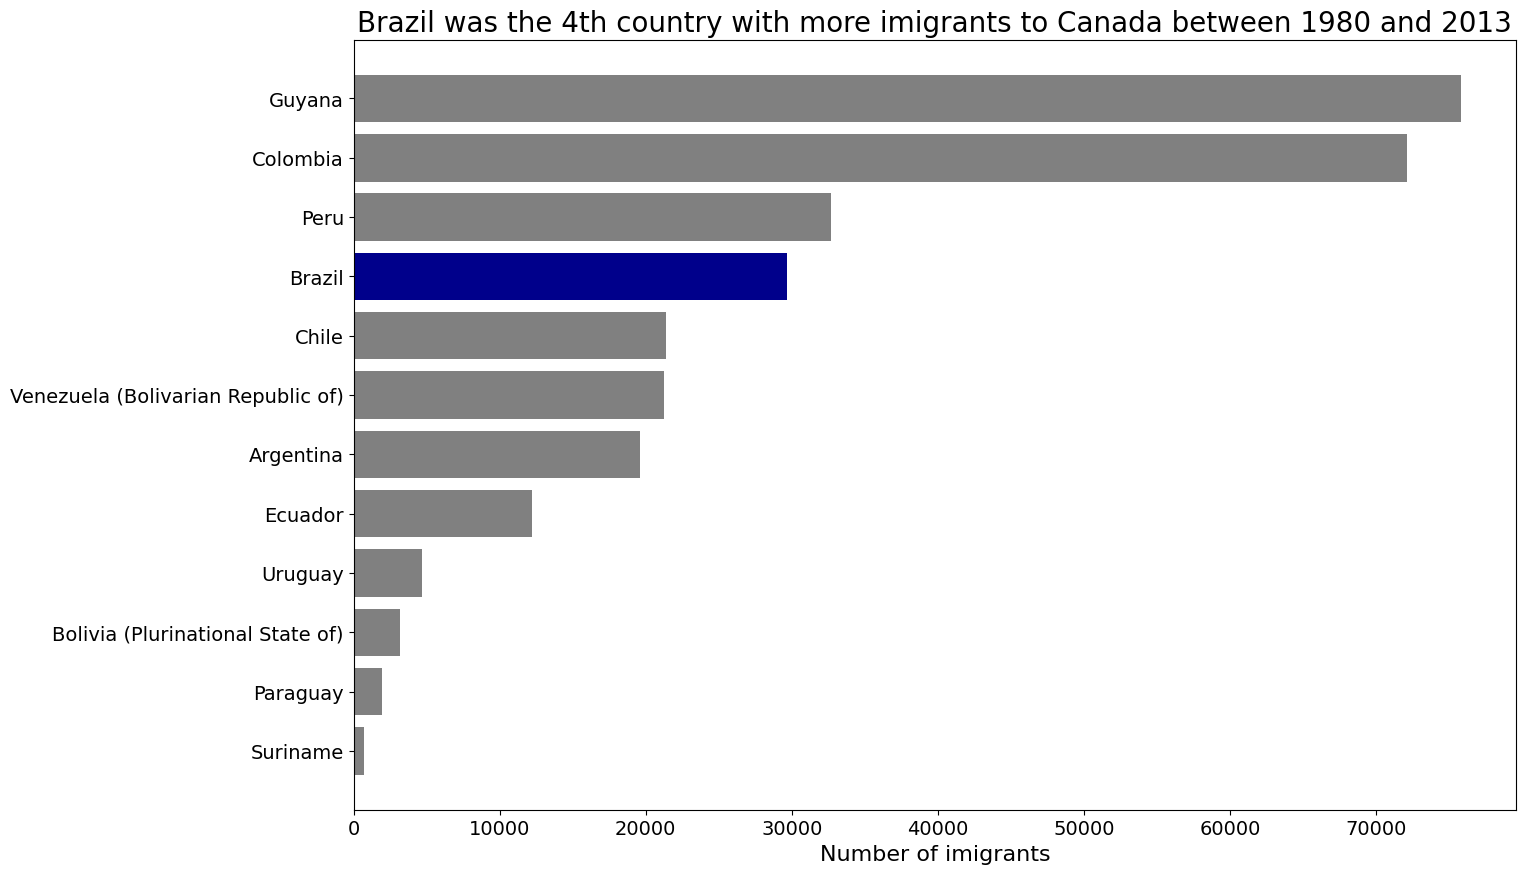

In [22]:
colors = []
for country in data_south_america.index:
    if country == 'Brazil':
        colors.append("darkblue")
    else:
        colors.append("gray")

fig, ax = plt.subplots(figsize=(15,10))
ax.barh(data_south_america.index, data_south_america.Total, color=colors)
ax.set_title("Brazil was the 4th country with more imigrants to Canada between 1980 and 2013", fontsize=20)
ax.set_xlabel("Number of imigrants", fontsize=16)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
plt.show()

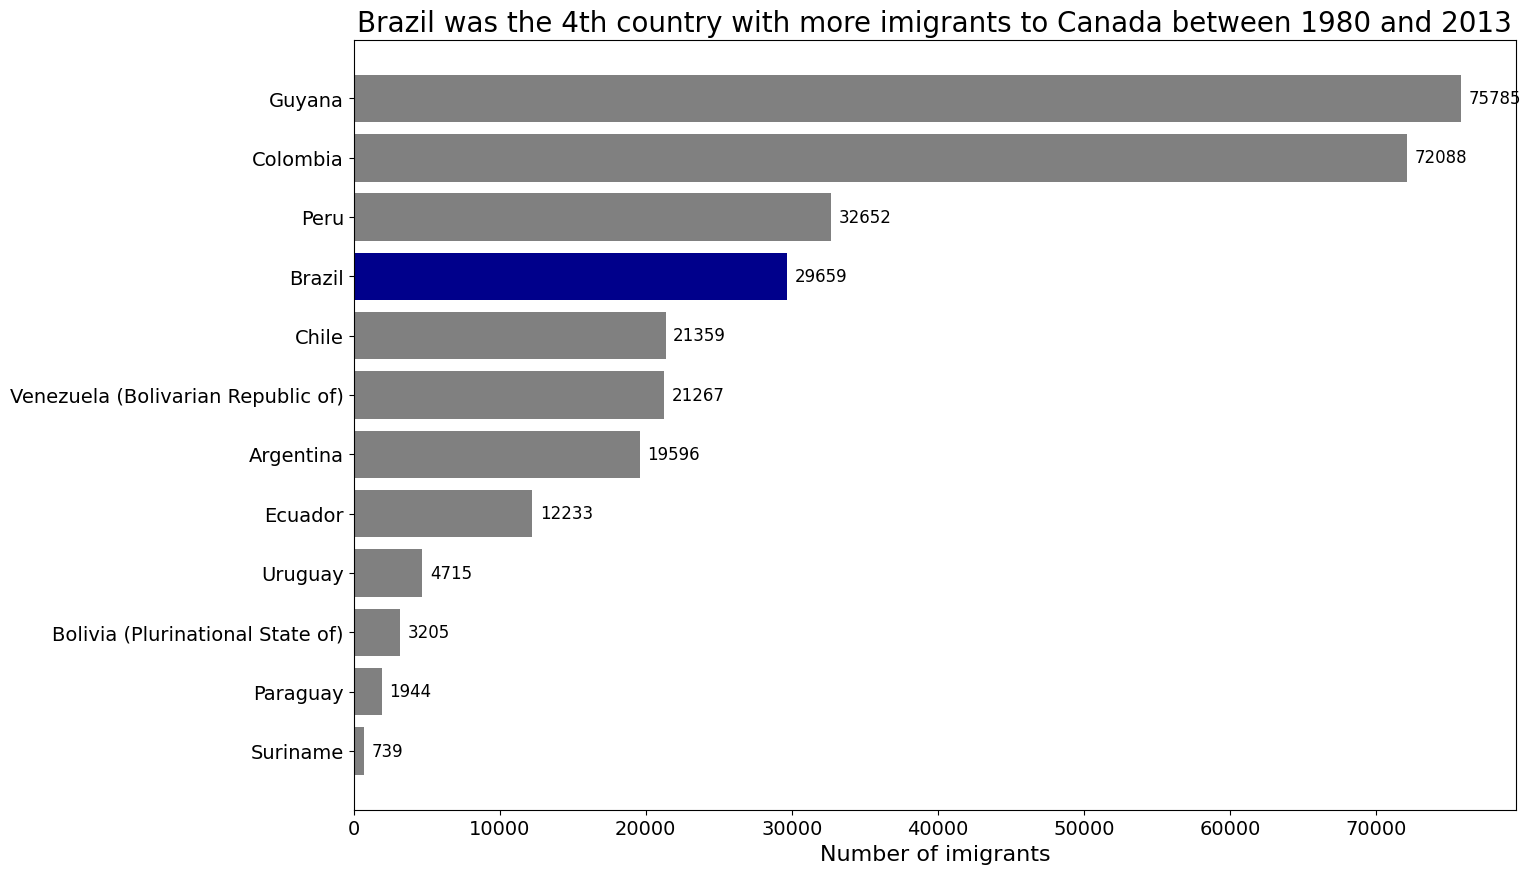

In [23]:
colors = []
for country in data_south_america.index:
    if country == 'Brazil':
        colors.append("darkblue")
    else:
        colors.append("gray")

fig, ax = plt.subplots(figsize=(15,10))
ax.barh(data_south_america.index, data_south_america.Total, color=colors)
ax.set_title("Brazil was the 4th country with more imigrants to Canada between 1980 and 2013", fontsize=20)
ax.set_xlabel("Number of imigrants", fontsize=16)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)

for i, v in enumerate(data_south_america.Total):
    ax.text(v+520, i, str(v), color='black', fontsize=12, ha='left', va='center')

ax.set_frame_on(True) #Exibe ou oculta o frame que está atrás.
plt.show()


# 7. Salvando Gráficos

In [24]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


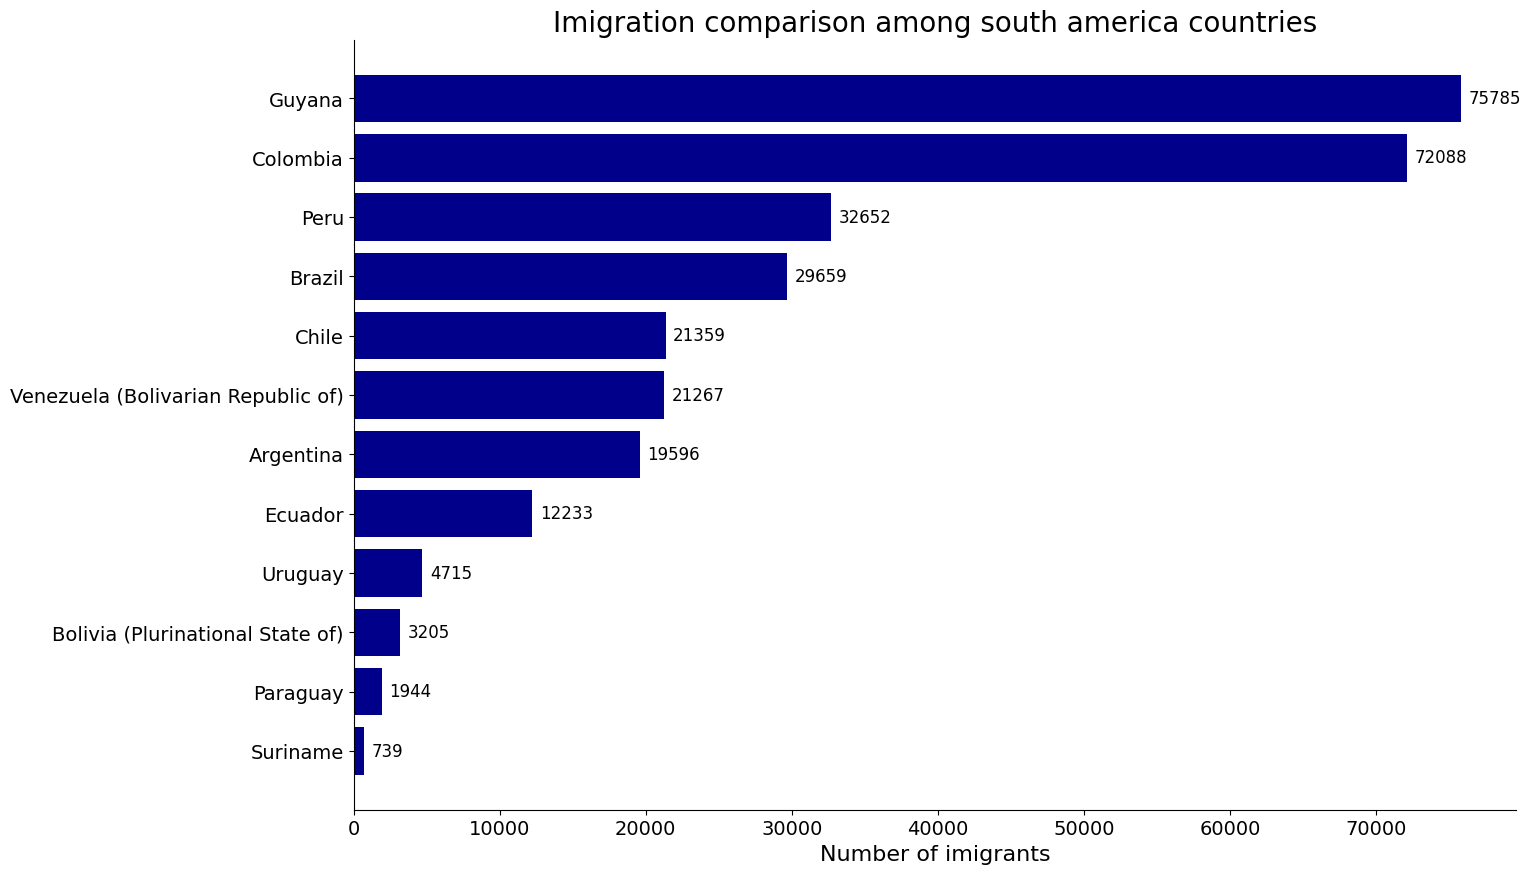

In [25]:
colors = ['darkblue']

fig, ax = plt.subplots(figsize=(15,10))
ax.barh(data_south_america.index, data_south_america.Total, color=colors)
ax.set_title("Imigration comparison among south america countries", fontsize=20)
ax.set_xlabel("Number of imigrants", fontsize=16)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)

for i, v in enumerate(data_south_america.Total):
    ax.text(v+520, i, str(v), color='black', fontsize=12, ha='left', va='center')

ax.set_frame_on(True) #Exibe ou oculta o frame que está atrás.
ax.spines['top'].set_visible(False) #Exibe ou oculta o frame de topo. Só é perceptível depois que salvar o gráfico como imagem.
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_visible(True) 
fig.savefig('imigracao_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

# 8. Seaborn

In [31]:
sns.set_theme()
sns.set_style("darkgrid")
sns.set_palette("viridis")

In [28]:
top_10 = data_imigration.sort_values('Total', ascending=False).head(10)

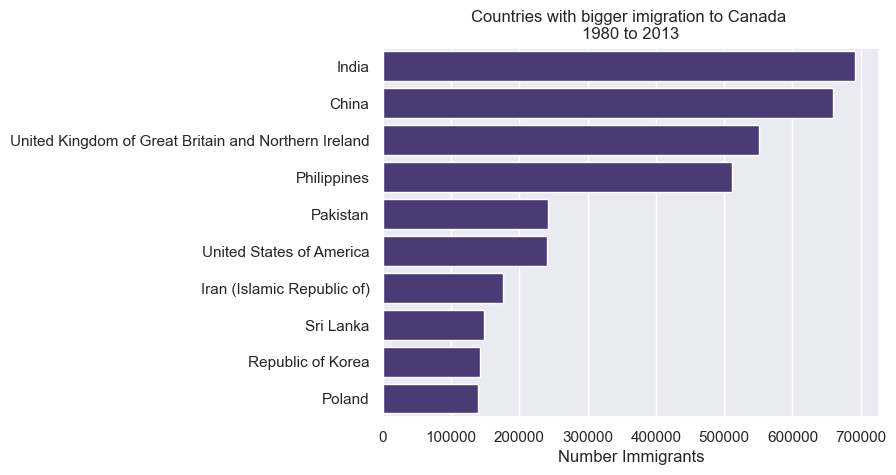

In [47]:
ax = sns.barplot(data=top_10, y=top_10.index, x='Total')
ax.set(title="Countries with bigger imigration to Canada \n1980 to 2013", xlabel="Number Immigrants", ylabel='')
plt.show()

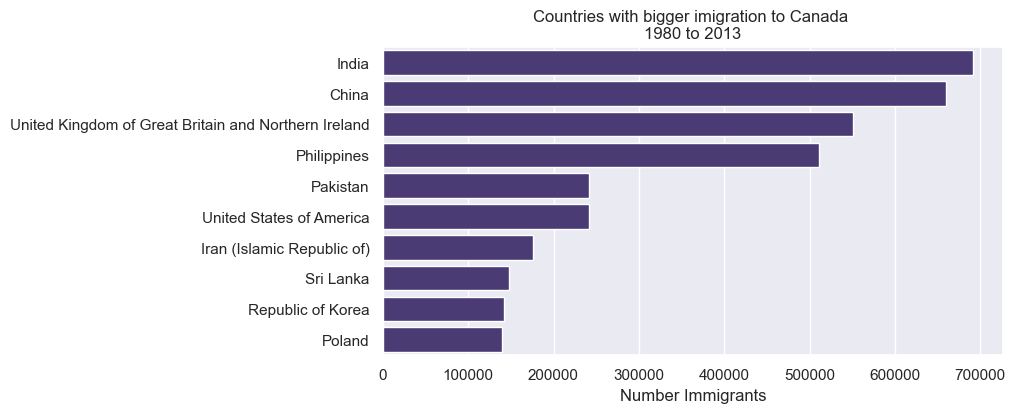

In [48]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=top_10, y=top_10.index, x='Total')
ax.set(title="Countries with bigger imigration to Canada \n1980 to 2013", xlabel="Number Immigrants", ylabel='')
plt.show()

# 9. Color Palettes Seaborn

In [49]:
def generate_palette(palette):
    sns.set_palette(palette)
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total')
    ax.set(title="Countries with bigger imigration to Canada \n1980 to 2013", xlabel="Number Immigrants", ylabel='')
    plt.show()

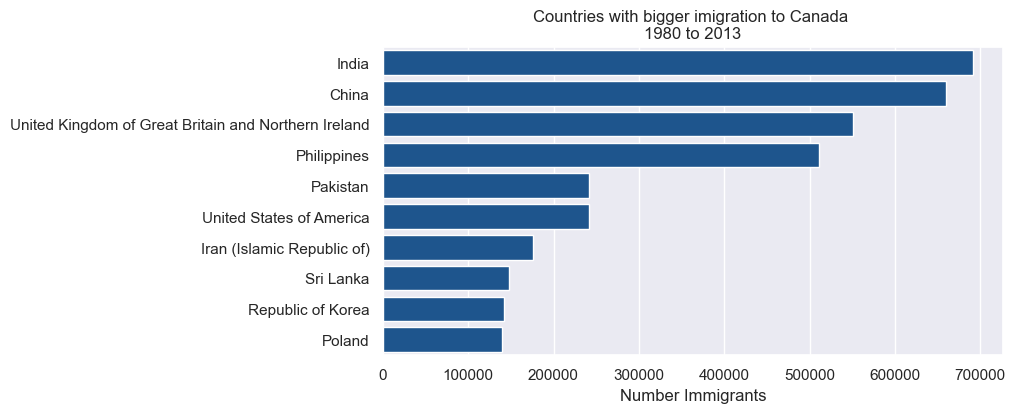

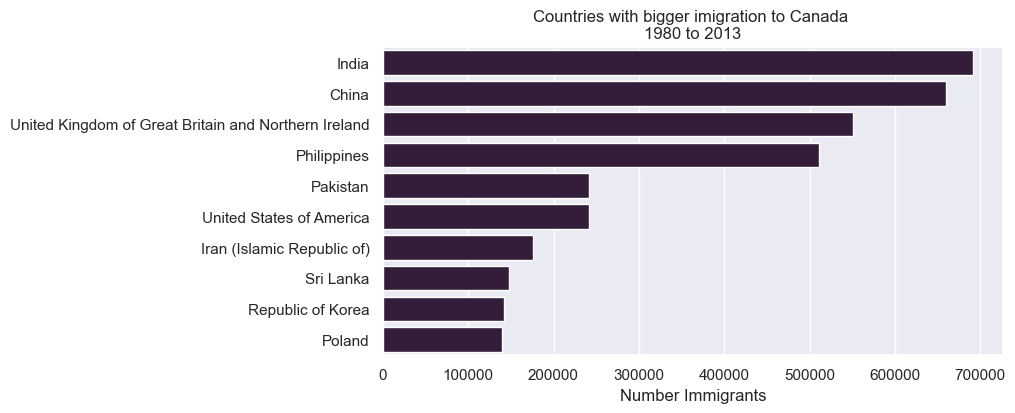

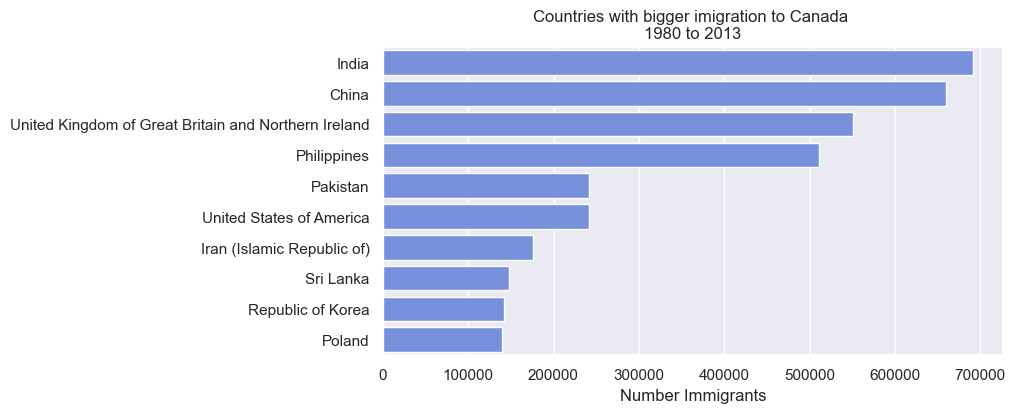

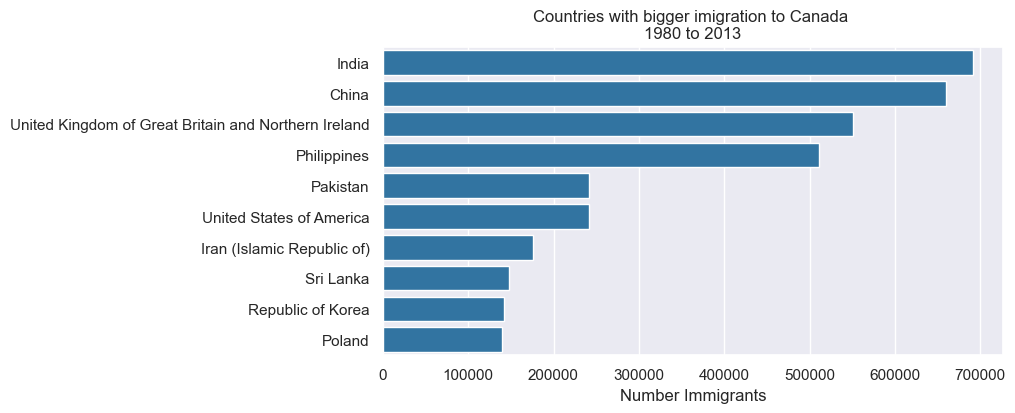

In [53]:
generate_palette("Blues_r")
generate_palette("rocket")
generate_palette("coolwarm")
generate_palette("tab10")

# 10. Plotly

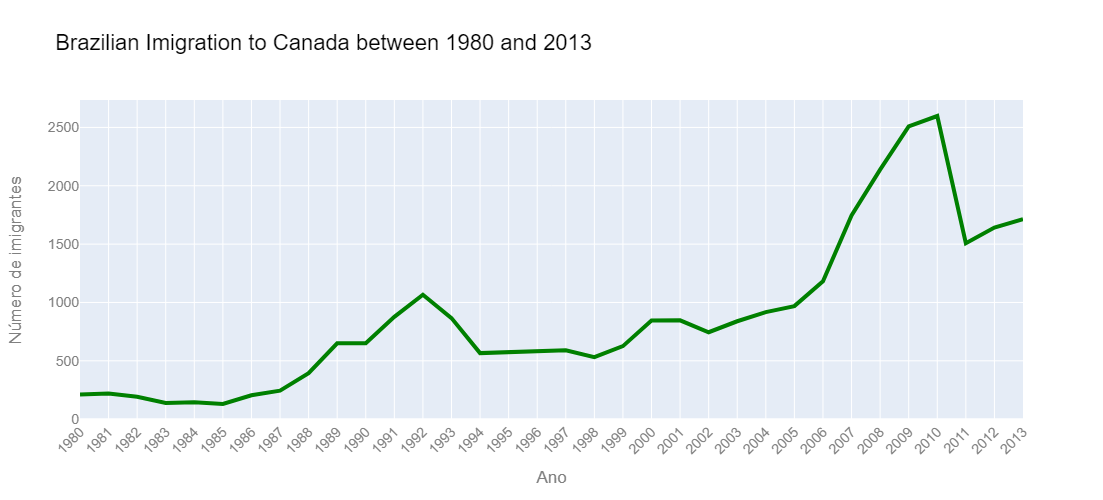

In [68]:
fig = px.line(data_brazil, x=data_brazil.index, y=data_brazil.Brazil,
             title='Brazilian Imigration to Canada between 1980 and 2013')

fig.update_traces(line_color='green', line_width=4)

fig.update_layout(width=1100, height=500,
                  xaxis={'tickangle':-45},
                  font_family='Arial',
                  font_size=14,
                  font_color='grey',
                  title_font_color='black',
                  title_font_size=22,
                  xaxis_title='Ano',
                  yaxis_title='Número de imigrantes')

fig.show()

In [78]:
data_south_america_treated = data_south_america.drop(['Region', 'Continent', 'Total'], axis=1)
data_south_america_treated.columns

Index(['DevName', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [80]:
data_south_america_treated_final = data_south_america_treated.T
data_south_america_treated_final.head(2)

Country,Suriname,Paraguay,Bolivia (Plurinational State of),Uruguay,Ecuador,Argentina,Venezuela (Bolivarian Republic of),Chile,Brazil,Peru,Colombia,Guyana
DevName,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions
1980,15,45,44,128,238,368,103,1233,211,317,266,2334


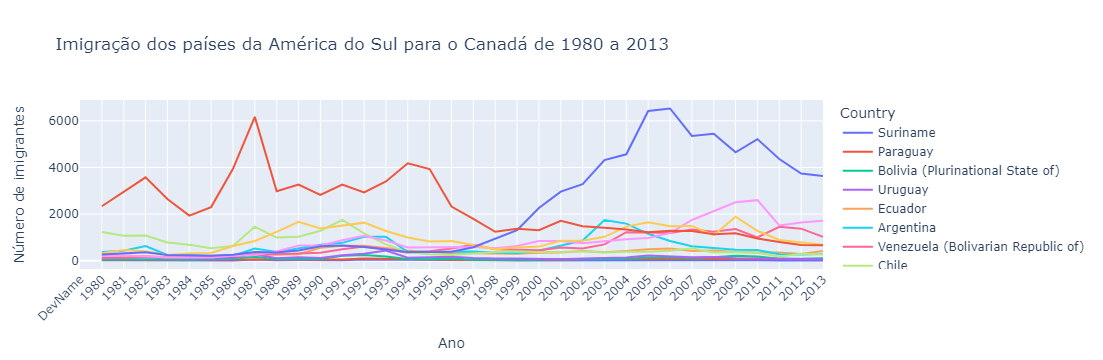

In [85]:
fig = px.line(data_south_america_treated_final, x=data_south_america_treated_final.index, y=data_south_america_treated_final.columns, color='Country', 
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013', markers=False)

fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

# 11. Inserindo Animações no Plotly

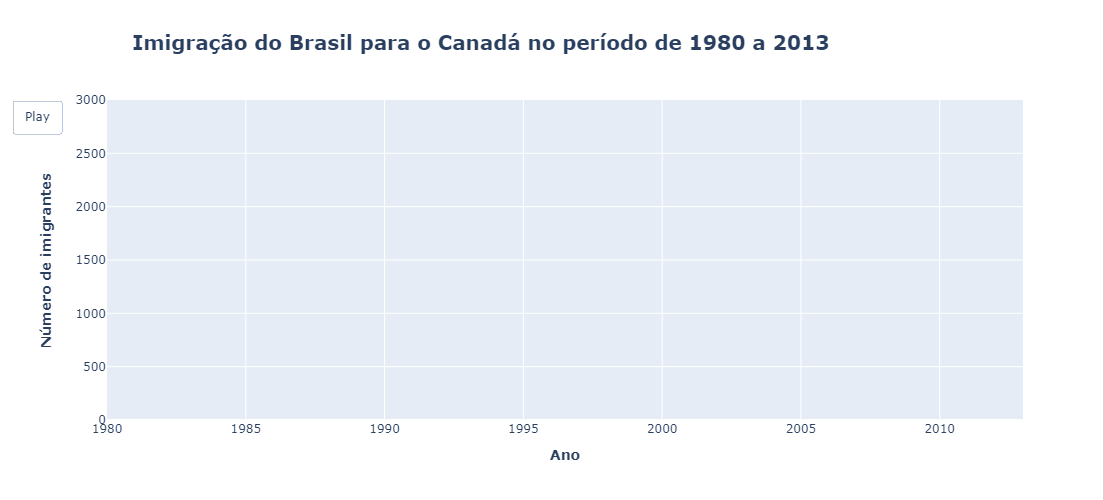

In [97]:
import plotly.graph_objs as go
data_brazil['Year'] = data_brazil.index
data_brazil['Year'] = data_brazil['Year'].astype(int)
# Criando uma figura
fig = go.Figure()

# Adicionando a linha do gráfico e definindo a espessura da linha
fig.add_trace(
    go.Scatter(x=[data_brazil['Year'].iloc[0]], y=[data_brazil.Brazil.iloc[0]], mode='lines', name='Imigrantes', line=dict(width=4))
)

# Definindo as configurações de layout
fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil para o Canadá no período de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de imigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1000, 
    height=500 
)

# Definir as configurações de animação
frames = [go.Frame(data=[go.Scatter(x=data_brazil.Year.iloc[:i+1], y=data_brazil.Brazil.iloc[:i+1])]) for i in range(len(data_brazil))]
fig.frames = frames

# Mostrando a figura
fig.show()